# Generalizing to higher dimensions

## Intro

Linear algebra generalizes all the concepts we've handled thus far in 2D, 3D and 4D to any number of dimensions.

In this chapter, we will also create *programmatic generalizations* and define *vector spaces*. Vector spaces are collections of objects that we can treat like vectors. These can be arrows in the plane, tuples of numbers, or objects that we can treat like vectors such as images (which we can combine to create new images).

The key operations in a vector space will be vector addition, and scalar multiplication, as with these you will be able to do linear combinations.

## Generalizing the definition of a vector

Python supports OOP, and we will leverage this technique as it will let us create a *parent class* from which 2D, 3D and vectors from higher dimensions can inherit from.

![OOP with vectors](../images/vectors-oop.png)

### Creating a class for vectors in the 2D plane

In our previous examples, our 2D and 3D vectors have been defined as *coordinate vectors*. That is, they were represented by tuples of numbers that were their coordinates.

Now we will use a class instead of a tuple, to have more control of the definitions and operations.

In [10]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

# Constructing Vectors
v = Vec2(1.6, 3.8)
print('v=({}, {})'.format(v.x, v.y))

# Adding vectors
v = Vec2(3, 4)
w = v.add(Vec2(-2, 6))
print('w=({}, {})'.format(w.x, w.y))

# Scaling vectors
u = Vec2(1, 1).scale(50)
print('({}, {}).scale({}) = ({}, {})'.format(1, 1, 50, u.x, u.y))

# equality
print(Vec2(3, 4) == Vec2(3, 4))


v=(1.6, 3.8)
w=(1, 10)
(1, 1).scale(50) = (50, 50)
True


Note that the approach is slightly different now. You call a constructor to initialize a vector, and the vector operations are class methods rather than standalone functions.

Note also that the `Vec2.add(...)` method returns a new vector.

### Improving the `Vec2` class

In the same way we defined the `__eq__(...)` method, we can define some other additional methods that would provide some syntactic sugar that would improve the development experience for the users of our library.

In [ ]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __add__(self, v2):
        return self.add(v2)
    
    def __mul__(self, scalar):
        return self.scale(scalar)
    
    def __rmul__(self, scalar):
        return self.scale(scalar)

Finally, we can also define the `__repr__(...)` method that will be called when we need a string representation of the vector.

In [ ]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __add__(self, v2):
        return self.add(v2)
    
    def __mul__(self, scalar):
        return self.scale(scalar)
    
    def __rmul__(self, scalar):
        return self.scale(scalar)
    
    def __repr__(self):
        return 'Vec2({}, {})'.format(self.x, self.y)

Now we can do amazing things such as:

In [1]:
class Vec2():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

    def scale(self, scalar):
        return Vec2(self.x * scalar, self.y * scalar)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __add__(self, v2):
        return self.add(v2)
    
    def __mul__(self, scalar):
        return self.scale(scalar)
    
    def __rmul__(self, scalar):
        return self.scale(scalar)
    
    def __repr__(self):
        return 'Vec2({}, {})'.format(self.x, self.y)

print(3.0 * Vec2(1, 0) + 4.0 * Vec2(0, 1))        

Vec2(3.0, 4.0)


### Repeating the process with 3D vectors

The same approach can be taken for 3D vectors:
+ We will define the class
+ Add methods for addition and scalar product
+ Add equality methods
+ Enable operator overloading for `+` and `*`.

In [3]:
class Vec3():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z

    def __add__(self, v2):
        return self.add(v2)

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)

    def __repr__(self):
        return 'Vec3({}, {}, {})'.format(self.x, self.y, self.z)

print(2.0 * (Vec3(1, 0, 0) + Vec3(0, 1, 0)))        

Vec3(2.0, 2.0, 0.0)


Having written the classes for vectors in 3D and 3D opens the door for generalization. There are multiple ways of generalizing the approach, but we will focus on how we use the vectors, and not in how they work. This approach will let us define functions that will work for any number of dimensions: it will let us separate the *what* from the *how*.

### Building a vector base class

The basic operations we do with our `Vec2` and `Vec3` classes has been:
+ constructing new instances
+ add vectors to vectors
+ multiply scalars to vectors
+ testing equality
+ representing the vector as a string

Out of these operations, only vector addition and scalar product are distinctive vector operations: the rest are just Python related methods.

Let's define our base class for vectors according to this fact.


In [ ]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):

    @abstractmethod
    def scale(self, scalar):
        pass

    @abstractmethod
    def add(self, other):
        pass

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)

    def __add__(self, v2):
        return self.add(v2)

The `abc` module contains helper classes, functions, and method decorators that help define abstract base classes &mdash; a class that is not intended to be instantiated, but instead should be used as a template for classes that inherit from it.

As a result, with our `Vector` class definition we are giving the template for the classes that will inherit from it, forcing them to have methods for vector addition and scalar product.

The `@abstractmethod` decorators is used to tag the method as abstract, that is, not implemented in the base class but in the concrete subclasses.

By contrast, the methods that implement the operator overloading for `*` and `+` can be fully specified in our base class.

We can now define `Vec2` as a child class of `Vec`:

In [ ]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):

    @abstractmethod
    def scale(self, scalar):
        pass

    @abstractmethod
    def add(self, other):
        pass

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)

    def __add__(self, v2):
        return self.add(v2)

class Vec2(Vector):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)

    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __repr__(self):
        return 'Vec2({}, {})'.format(self.x, self.y)        

This approach has saved us from repeating ourselves: The methods that were identical between `Vec2` and `Vec3` are now part of the base class, while the remaining methods which were different for `Vec2` and `Vec3` must be implemented by the concrete class.

This approach also let us *enrich* the base class as we discover more operations that we want to provide to the child classes that inherit from `Vector`, for example, `subtract(...)`:

In [4]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):

    @abstractmethod
    def scale(self, scalar):
        pass

    @abstractmethod
    def add(self, other):
        pass

    def __mul__(self, scalar):
        return self.scale(scalar)

    def __rmul__(self, scalar):
        return self.scale(scalar)

    def __add__(self, v2):
        return self.add(v2)
    
    def subtract(self, other):
        return self.add(-1 * other)

    def __sub__(self, other):
        return self.subtract(other)

class Vec2(Vector):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def add(self, other):
        return Vec2(self.x + other.x, self.y + other.y)

    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __repr__(self):
        return 'Vec2({}, {})'.format(self.x, self.y)  

print(Vec2(1, 3) - Vec2(5, 1))        

Vec2(-4, 2)


Note how we have *enriched* the child class `Vec2` with a `subtract(...)` method without changing the `Vec2` source code at all.

### Defining vector spaces

In this section, we will switch from Python code to mathematical language to see how we can define a similar generalization of the vector concept.

In math, a vector is defined for what it does, rather than for what it is. Let's start with an incomplete definition of a vector:

> | DEFINITION |
| :--------- |
| A vector is an object equipped with a *suitable* way to add it to other vectors and multiply it by scalars. |

What is missing from the previous definition is the explicit definition *suitability*. That can be given as a set of rules that any *object* candidate to qualify as a vector must fulfill:

1. Adding vectors in any order shouldn't matter: $ v + w = w + v $
2. Adding vectors in any grouping shouldn't matter: $ u + (v + w) = (u + v) + w $

Note that for example, strings and concatenation do not fulfill these rules and therefore, do not qualify as vectors as `"hot" + "dog" != "dog" + "hot"`.

Additional rules must be given for well-behaved scalar multiplications:

1. Multiplying vectors by several scalars should be the same as multiplying by all the scalars at once. That is, if $ a $ and $ b $ are scalars and $ v $ i s a vector, then $ a (b v) = (a b) v $.
2. Multiplying a vector by 1 should leave the vector unchanged: $ 1 v = v $.
3. Addition of scalars should be compatible with scalar multiplication: $ a v + b v = (a + b) v$.
4. Addition of vectors should be compatible with scalar multiplication: $ a (v + w) = av + aw $. 

The takeaway from these rules is that we have a way to check if an object can be effectively considered a vector, and lead us to define the concept of a *vector space* as a collection of compatible vectors:

> | DEFINITION |
| :--------- |
| A vector space is a collection of objects called vectors, equipped with suitable vector addition and scalar multiplication operations, such that every linear combination of vectors in the collection produces a vector that is also in the collection. |

A collection like `[Vec2(1, 0), Vec2(5, -3), Vec2(1.1, 0.8)]` is a group of vectors but it is not a vector space as the linear combination `1 * Vec2(1, 0) + 1 * Vec2(5, -3) = Vec2(6, -3)` which is not a vector of the collection.

As you can imagine, most vector spaces are infinite sets containing of the possible linear combinations of the elements of the vector space and the infinite number of scalars there are. Such an infinite set is the collection of all possible 2D vectors.

There are two implications of the fact that vector spaces need to contain all their scalar multiples.

First, $ 0 \cdot v = \vec{0} $ that is, no matter what vector you pick, multiplying it by the scalar 0 will render the *zero vector*. Adding the *zero vector* to any vector leaves that vector unchanged: $ \vec{0} + v = v $.

Second, every vector $ v $has an opposite vector $ -1 \cdot v $ written as $ -v $. As $ v + (-v) = (1 + (-1)) v = 0 v = \vec{0} $. That is, for every vector there is another vector in the vector space that *cancels it out* by addition. 

### Unit testing vector space classes

In Math, suitability is guaranteed by *writing a proof*. In code, we rely in writing unit tests.

For instance, we can check rule #4 for well-behaved scalar multiplication doing:


In [1]:
from vector2d import Vec2

s = -3
u, v = Vec2(42, -10), Vec2(1.5, 8)

# should be true
s * (u + v) == s * v + s * u

True

Obviously, the test is quite weak, but we're off to a good start.

We can improve it a little bit by selecting random numbers and using Python's assert:

In [2]:
from vector2d import Vec2
from random import uniform

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

a = random_scalar()
u, v = random_vec2(), random_vec2()

# this should fail because right and left parts differ by very small fractions
assert a * (u + v) == a * v + a * u    

AssertionError: 

The previous test can be fixed by using Python's `math.isclose(...)`. Also, we can make the test more robust by testing the rule hundred times rather than just once:

In [5]:
from vector2d import Vec2
from random import uniform
from math import isclose

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

def approx_equal_vec2(v, w):
    return isclose(v.x, w.x) and isclose(v.y, w.y)

for _ in range(0, 100):
    a = random_scalar()
    u, v = random_vec2(), random_vec2()

    assert approx_equal_vec2(a * (u + v),  a * v + a * u)

Now we can test the 6 vector space properties defined above:

1. $ v + w = w + v $

2. $ u + (v + w) = (u + v) + w $

1. $ a (b v) = (a b) v $

2. $ 1 v = v $

3. $ a v + b v = (a + b) v $

4. $ a (v + w) = av + aw $

In [6]:
from vector2d import Vec2
from random import uniform
from math import isclose

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

def approx_equal_vec2(v, w):
    return isclose(v.x, w.x) and isclose(v.y, w.y)

def test(eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

for _ in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a, b, u, v, w)

print('Test completed :)')

Test completed :)


Note that this setup isn't completely generic, as we had to write special functions to generate random `Vec2` instances and to compare them. The important part is that the test function itself and the expressions are generic, so the amount of work needed when we need to validate for other vector spaces will be small.

## Exploring different vectors spaces

With the concept of *vector space* already introduced, we will explore some examples by taking a look at a new kind of object and implement it as a class that inherits from `Vector`.

By definition, the new class will support *addition*, *scalar multiplication* and the other well-known vector operations.

### Enumerating all coordinate vector spaces

We have implemented `Vec2`, `Vec3` and `Vec6`. But what about `Vec1`. Let's explore what happens when we create that class and explore its properties:

In [7]:
from vector import Vector

class Vec1(Vector):
    def __init__(self, x):
        self.x = x

    @classmethod
    def zero(cls):
        return Vec1(0)

    def add(self, other):
        return Vec1(self.x + other.x)

    def scale(self, scalar):
        return Vec1(scalar * self.x)

    def __eq__(self, other):
        if not self.__class__ in other.__class__.mro():
            return False
        else:
            return self.x == other.x

    def __repr__(self):
        return 'Vec1({})'.format(self.x)  


print(Vec1(2) + Vec1(3))
print(3 * Vec1(1))
print(Vec1(6) / 2)

Vec1(5)
Vec1(3)
Vec1(3.0)


The interesting takeaway is that `Vec1` defines a vector space in its own right! with vector addition being the regular real number addition and scalar multiplication being the regular multiplication.

The set of all real numbers (including integers, fractions, and irrational numbers) is denoted as $ \mathbb{R} $

> $ \mathbb{R} $ is a vector space where the scalars and the vectors are the same kind of objects.

Coordinate vector spaces are denoted $ \mathbb{R}_n $ where $ n $ is the dimension or number of coordinates so that $ \mathbb{R}_2 $ is the 2D plane and $ \mathbb{R}_3 $ is the 3D space.

As long as real numbers are used, any vector space is some $ \mathbb{R}_n $ in disguise.

The vector space $ \mathbb{R}_0 $ is the set of vectors with zero coordinates, which can also be implemented in Python:

In [9]:
from vector import Vector

class Vec0(Vector):
    def __init__(self):
        pass

    @classmethod
    def zero(cls):
        return Vec0()

    def add(self, other):
        return Vec0()

    def scale(self, scalar):
        return Vec0()

    def __eq__(self, other):
        return self.__class__ == other.__class__

    def __repr__(self):
        return 'Vec0()'


print(Vec0() + Vec0())
print(3 * Vec0())
print(Vec0() / 2)

Vec0()
Vec0()
Vec0()


### Identifying vector spaces in the wild

Let's consider the following dataset that consists of information about used Toyota Priuses.

```json
[
  ["Post status","Year","Model","Miles","Price","Source","Time Posted","Location","Title & Link"],
  ["For Sale","2005","Prius","114000","3500","craigslist","11/30 - 06:44","San Francisco, CA","toyota prius "],
  ["For Sale","2015","Prius","n/a","12500","craigslist","11/30 - 07:00","Seattle, WA","Toyota prius 2015 "],
```

The first element of the array are the columns of the dataset, while the remaining elements constitutes the data.

We can easily define a `CarForSale` class that would model the information in the dataset:



In [ ]:
def CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime, model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

Let's consider whether it would be interesting to consider `CarForSale` objects as vectors:
> We could average them as a linear combination to see what typical Prius for sale looks like

Obviously, the numeric fields `model_year`, `mileage`, `price` can be added like coordinates of a regular vector, but the string properties can't. Thus, when we do arithmetics with this properties we will set them to the string `'(virtual)'` to remind us of this fact.

Also, we can't add datetimes, but we can add timespans. For example, we could use the day we retrieved the data as a reference point, and add the time spans since the cars were posted for sale.

Let's do those modifications in the class:

In [ ]:
from datetime import datetime
from vector import Vector

class CarForSale(Vector):
    reference_date = datetime(2018, 11, 30, 12) # 30-Nov-2018-12:00:00

    def __init__(self, model_year, mileage, price, posted_datetime, model='(virtual)', source='(virtual)', location='(virtual)', description='(virtual)'):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

    def add(self, other):
        def add_dates(d1, d2):
            age1 = CarForSale.reference_date - d1
            age2 = CarForSale.reference_date - d2
            sum_age = age1 + age2
            return CarForSale.reference_date - sum_age

        return CarForSale(
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )

    def scale(self, scalar):
        def scale_date(d):
            age = CarForSale.reference_date - d
            return CarForSale.reference_date - (scalar * age)

        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )

    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.reference_date)

Let's give it a run and see how the vector space operations work with this class. In order to do that we need load some data:

In [16]:
from car_for_sale import CarForSale

from json import loads, dumps
from pathlib import Path
from datetime import datetime

contents = Path('cargraph.json').read_text()
cg_objects = loads(contents)
cleaned = []

def parse_date(s):
    input_format='%m/%d - %H:%M'
    dt = datetime.strptime(s, input_format).replace(year=2018)
    return dt

for car in cg_objects[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2], car[5], car[7], car[8])
        cleaned.append(row)
    except:
        pass

cars = cleaned


# print first car
print(cars[0].__dict__)

# add first and second car
print((cars[0] + cars[1]).__dict__)

{'model_year': 2005, 'mileage': 114000.0, 'price': 3500.0, 'posted_datetime': datetime.datetime(2018, 11, 30, 6, 44), 'model': 'Prius', 'source': 'craigslist', 'location': 'San Francisco, CA', 'description': 'toyota prius '}
{'model_year': 4012, 'mileage': 306000.0, 'price': 6100.0, 'posted_datetime': datetime.datetime(2018, 11, 30, 3, 59), 'model': '(virtual)', 'source': '(virtual)', 'location': '(virtual)', 'description': '(virtual)'}


In [ ]:
The sum does not seem to be very meaningful per se, but if we calculate the average of all the cars:

In [18]:
average_prius = sum(cars, CarForSale.zero()) / len(cars)

print(average_prius.__dict__)

{'model_year': 2012.5365853658536, 'mileage': 87731.63414634147, 'price': 12574.731707317074, 'posted_datetime': datetime.datetime(2018, 11, 30, 9, 0, 49, 756098), 'model': '(virtual)', 'source': '(virtual)', 'location': '(virtual)', 'description': '(virtual)'}


That means:
* the average car age is 2012
* the average mileage of the cars for sale is 87732 miles
* the average price is 12574
* the average date in which the ad was posted was 30-Nov-2018

Thus, we see that apart from the string data, the `CarForSale` behaves like a 4D vector with dimensions price, model year, mileage and datetime of posting.

### Treating functions as vectors

Mathematical functions can also be considered vectors.

In math we define functions as:

$
f: \mathbb{R} \Rightarrow \mathbb{R}
$

> In Python, those will be regular functions that take a float and return a float.

We can write functions algebraically as in $ f(x) = 0.5 \cdot x + 3 $ or $ g(x) = sin(x) $ and we will be able to visualize them graphically too.

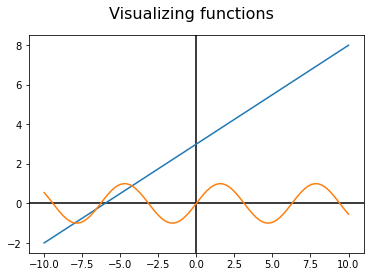

In [20]:
# see https://matplotlib.org/3.3.2/gallery/subplots_axes_and_figures/
import numpy as np
import matplotlib.pyplot as plt 
from math import sin

def f(x):
    return 0.5 * x + 3

def g(x):
    return sin(x)

def plot(functions, xmin, xmax, title=None):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    if title:
        fig.suptitle(title, fontsize=16)
    for f in functions:
        ys = [f(x) for x in xs]
        plt.plot(xs, ys)

plot([f, g], -10, 10, title="Visualizing functions")

Algebraically, we can add functions by adding the expressions that define them:

$
f(x) = 0.5 \cdot x + 3 \\
g(x) = sin(x)\\
(f + g)(x) = f(x) + g(x) = 0.5 \cdot x + 3 + sin(x)
$

Visually, we would do:

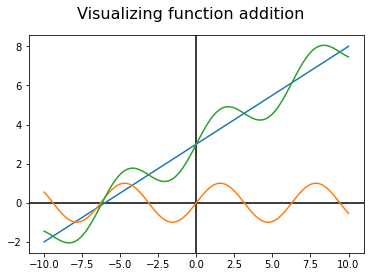

In [2]:
from my_plot import plot
from math import sin

def f(x):
    return 0.5 * x + 3

def g(x):
    return sin(x)

def add_functions(f, g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

plot([f, g, add_functions(f, g)], -10, 10, 'Visualizing function addition')

Likewise, we can algrebraically multiply a function by an scalar by multiplying its expression by that scalar:

$
g(x) = sin(x)\\
a \cdot g(x) = a \cdot sin(x)
$

Visually, we would do:

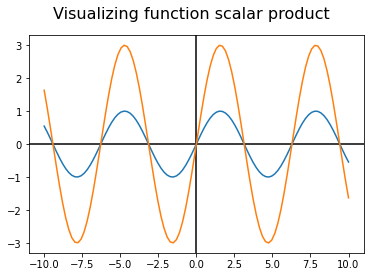

In [4]:
from my_plot import plot
from math import sin

def g(x):
    return sin(x)

def mult_function(scalar, f):
    def new_function(x):
        return scalar * g(x)
    return new_function

plot([g, mult_function(3, g)], -10, 10, 'Visualizing function scalar product')

Everything we've seen so far indicates that functions are actually a vector space, and that we would be able to create a Python class for functions and make it inherit from `Vector` and then do linear combinations of functions such as `2 * f - 6 * g`.

But what is the dimension of the functions vector space? In order to do so, we need to think about how many real numbers uniquely identify a function, in the same way that we know that a set of 2 vectors uniquely identify a vector in the plane, and three values identify a vector in the 3D space.

By following that reasoning, we end up to the conclusion that the dimension of the functions vector space is infinite &mdash; in order to uniquely define a function $ f(x) $ we require all of the possible values of $ x $.

### Treating matrices as vectors

An n-by-m matrix can be treated as an $ n \times m $ dimensional vector. The only difference between the vector space in 15D and the $ 5 \times 3 $ matrices is that the coordinates are arranged in a rectangular fashion, in a matrix.

Let's see how to implement a class for $ 5 \times 3 $ matrices that inherit from the Vector class:

In [ ]:
from vector import Vector

class Matrix_5x3(Vector):
    rows = 5
    columns = 3

    def __init__(self, matrix):
        self.matrix = matrix

    def add(self, other):
        return Matrix_5x3(
            tuple(
                tuple(a + b for a, b in zip(row1, row2))
                for (row1, row2) in zip(self.matrix, other.matrix)
            ))
    
    def scale(self, scalar):
        return Matrix_5x3(
            tuple(
                tuple(scalar * x for x in row)
                for row in self.matrix
            )
        )

    @classmethod
    def zero(cls):
        return Matrix_5x3(
            tuple(
                tuple(0 for j in range(0, cls.columns))
                for i in range(0, cls.rows)
            )
        )

The interesting thing of representing matrices as a vector space is that ultimately they represent linear functions.

If we recall from the previous chapter, an $ n \times m $ matrix $ A $ represents a linear function from m-dimensional space to n-dimensional space:
> $ A : \mathbb{R}_m \Rightarrow \mathbb{R}_m $

### Manipulating images with vector operations

On a computer, images are displayed as arrays of colored squares called *pixels*. In a color image, 3 numbers are needed to specify the red, green and blue content of the color of any given pixel.

In short, a 300x300 pixel image would be specified by $ 300 \cdot 300 \cdot 3 = 270,000 $ numbers. If we think of an image this size as a vector space, it means that a pixel $ 300 \times 300 $ image lives in a 270,000-dimensional space.

Python has a de-factor standard image manipulation library, *PIL*, which is distributed under the package name `pillow`. It is possible to create a class that inherits from Vector and stores the pixel data of $ 300 \times 300 $ images, and provides functions for addition and scalar multiplication.

In [ ]:
from PIL import Image
from vector import Vector

class ImageVector(Vector):
    size = (300, 300)

    def __init__(self, input):
        try:
            # the constructor accepts the name of an image file,
            # which gets resized to 300x300 and converted to a list
            # of pixels with each pixel being a triple r, g, b
            img = Image.open(input).resize(ImageVector.size)
            self.pixels = img.getdata()
        except:
            # accept directly a list of pixels as a fallback
            self.pixels = input

    def image(self):
        # prepare a PIL image, in RGB format with size 300x300
        img = Image.new('RGB', ImageVector.size)

        # reconstruct the image from the pixels stored in the object
        img.putdata([(int(r), int(g), int(b)) for (r, g, b) in self.pixels])
        return img

    def add(self, img2):
        return ImageVector([(r1+r2,g1+g2,b1+b2) 
                            for ((r1,g1,b1),(r2,g2,b2)) 
                            in zip(self.pixels,img2.pixels)])

    def scale(self, scalar):
        return ImageVector([(scalar * r, scalar * g, scalar * b) 
            for (r, g, b) in self.pixels])

    @classmethod
    def zero(cls):
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0, 0, 0) for _ in range(0, total_pixels)])

    def _repr_png_(self):
        # implementing a _repr_png_ function allows Jupyter notebooks to
        # display PIL images inline
        return self.image()._repr_png_()

Let's give it a try now to load two images by filename and do some vector arithmetic with them:

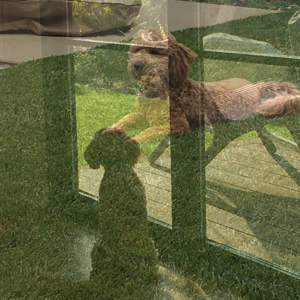

In [13]:
from image_vector import ImageVector

0.5 * ImageVector('inside.JPG') + 0.5 * ImageVector('outside.JPG')

While any `ImageVector` is valid, the min and max color values goes from 0 to 255. Because of this, if we *negate* an image it will be totally black as the color values will be out of range. Likewise, if we scale an image and the pixel value go beyond 255 the image will quickly become washed.

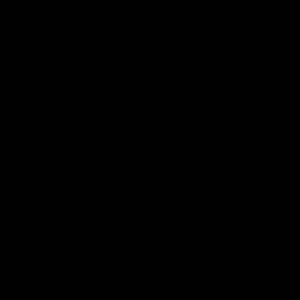

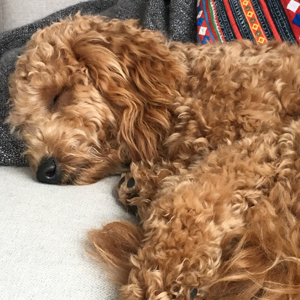

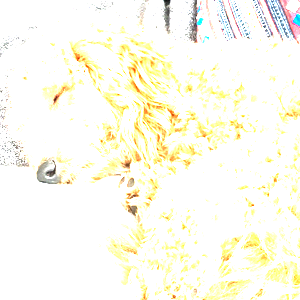

In [4]:
from image_vector import ImageVector
from IPython.display import display

display(-ImageVector('melba_sleeping.jpg'))
display(ImageVector('melba_sleeping.jpg'))
display(5 * ImageVector('melba_sleeping.jpg'))


In [ ]:
In order to make things more interesting, we need to do some modifications so that operations land in the range of acceptable brightness for the RGB components.

The *zero* vector (the image with all black pixels) and the vector with all values equal to 255 (all white) are good reference points.

For example, subtracting an image from an all white image has the effect of reversing the colors.

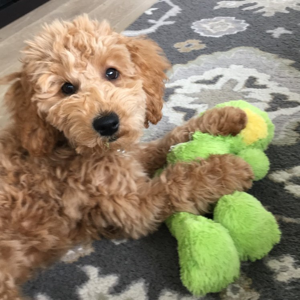

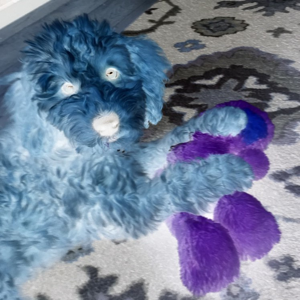

In [5]:
from image_vector import ImageVector
from IPython.display import display

# this uses the fallback route of the constructor
white = ImageVector([(255, 255, 255) for _ in range(0, 300 * 300)])

display(ImageVector('melba_toy.jpg'))
display(white - ImageVector('melba_toy.jpg'))

## Looking for smaller vector spaces

This section will deal with how to start with a vector space and find smaller ones (i.e. with fewer dimensions) that retain most of the interesting data from the original space.

For example, when using images, we can think about reducing the color specification of each of the pixels and use a shade of grey, or to reduce the number of distinct pixels.

### Identifying subspaces
A vector *subspace* is a vector space that exists inside another vector space. For example, the 2D x,y plane is a vector subspace of the 3D x,y,z space for z = 0. Specifically, the subspace consists of vectors of the form $ (x, y, 0) $. Those are legit vectors of the 3D space, but they form a subset that is constrained on plane, so we say that it is 2D subspace of $ \mathbb{R}^3 $.


Note that $ \mathbb{R}^2 $ cannot be considered a subspace of $ \mathbb{R}^3 $ as a vector denoted as $ (x, y) $ is not a valid 3D vector.

Note also that $ (x, y, 0) $ form a self-contained vector space because there's no way to build a linear combination of vectors of the form $ (x, y, 0) $ that would *escape* that space &mdash; that is, it is *closed* under linear combinations.

Following the same reasoning, points in the line $ y = 0 $ form a subspace of $ \mathbb{R}^2 $ as there's no way to escape the vector space. Also, if we $ x = 0, \hspace{1ex} y = 0 $ is a subspace (with a single point, the vector zero), as any linear combination of the vector zero is the vector zero.

### Starting with a single vector

A vector subspace containing a non-zero vector $ v $ contains at least all of the scalar multiples of $ v $. Geometrically, this lies of a line through the origin.

![Single vector subspace](../images/single_vector_subspace.png)

Each of these lines through the origin is a vector space & mdash; there's no way to escape the dotted line by adding or scaling vectors that lie in it.

This is the first mechanism we have to build subspaces: pick a vector and see all the linear combinations that come with it.

### Spanning a bigger space

Given a set of one or more vectors, their *span* is the set we use to denote all of their linear combinations. A span is automatically a vector subspace.

To accommodate the previous section to this newly defined term: the span of a single vector $ v $ is a line through the original. 

The span of a given vector is denoted: $ span(\{v\}) $, the span of two vectors $ v $ and $ w $ as $ span(\{v, w \}) $.

The $ span(\{v, w \}) $ includes the two lines $ span(\{ v \}) $ and $ span(\{ w \}) $, as well as linear combinations including both $ v $ and $ w $.

![span of two vectors](../images/span_of_two_vectors.png)

The span of two vectors is the entire plane &mdash; any pair of non-parallel vectors in the plane represent the entire plane. That is, any point $ (x, y) $ in the plane can be reached as the linear combination of those vectors. This is true for the standard basis vectors, as well as for any other pair of non parallel vectors such as $ v = (1, 0) $ and $ w = (1, 1) $.

For example, you can get to $ (4, 3) $ by doing $ (1, 0) + 3 \cdot (1, 1) $.

While a single non-zero vector spans a line in 2D or 3D, two non-parallel vectors span the whole 2D plane or a plane passing through the origin of the 3D space.

![Span of 2 vectors in 3D](../images/span_of_two_vectors_in_3d.png)

Note how it is *slanted*, and it doesn't contain any of the 3D standard basis vectors, but still it is a plane and a vector subspace of the 3D space.

If we add a third non-parallel vector to the mix, we wouldn't get a 3D space though, as 3 non-parallel vectors of the plane can get a z-coordinate. But the problem lies in the definition of the *parallelism* &mdash; we need a better generalization for the *"non-parallel"* vector concept.

If we want to add a vector and span a higher dimensional space, the new vector needs to point in a new direction that isn't included in the span of the existing ones.

The new definition of we are looking for is the "linear independency".

> A collection of vectors are *linearly dependent* if any of its members can be obtained as a linear combination of the others.

For example, two parallel vectors a linearly dependent, as they are scalar multiples of each other. Three non-parallel vectors in the 3D plane are linearly dependent as linear combinations of 2 non-parallel vectors span the whole 2D space. In the same way, the standard basis $ {e1, e2, e3} $ for $ \hspace{1ex}^3 $ is a linearly independent set, as non of the vectors can be built as a linear combination of the other two.

### Defining the dimension

